In [1]:
#Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
simple_dists = pd.read_csv('data/simple_dists.csv')
sd = simple_dists.sort_values(by='length')
sd.head()

,length,white,black,draw,unknown
112,0,499,468,246,0
134,1,82,90,44,1
94,2,56,50,52,1
106,3,194,181,645,0
101,4,564,437,2069,2


In [3]:
#print(sum(sd['total')

In [4]:
sd['total'] = sd['white'] + sd['black'] + sd['draw']
mean = sd['total'].mean()
std = sd['total'].std()
med = sd['total'].median()
Q1 = sd['total'].quantile(.25)
Q3 = sd['total'].quantile(.75)
print(mean)
print(std)
print(med)
print(Q1)
print(Q3)

26632.833333333332
45721.30026109697
749.5
24.25
32444.75


In [5]:
region = sd.loc[sd['length'] >= 1]
region = region.loc[region['length'] <= 100]
print(sum(sd['total']))
print(sum(region['total']))
print('{}%'.format(round(100*sum(region['total'])/sum(sd['total']), 2)))
#region

5592895
5574957
99.68%


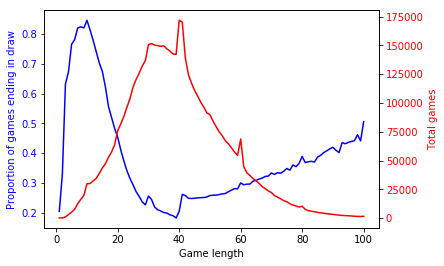

In [13]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

region_draw_prop = region['draw']/(region['white'] + region['black'] + region['draw'])

coef = np.polyfit(region['length'],region_draw_prop,1)
poly1d_fn = np.poly1d(coef)
coef = np.polyfit(region['length'],region_draw_prop,2)
poly2d_fn = np.poly1d(coef)
coef = np.polyfit(region['length'],region_draw_prop,3)
poly3d_fn = np.poly1d(coef)

ax1.plot(region['length'], region_draw_prop, color='blue')
ax1.set_ylabel('Proportion of games ending in draw', color='blue')  
ax1.tick_params(axis='y', labelcolor='blue')

ax1.set_xlabel('Game length')  

#ax1.plot(region['length'], poly1d_fn(region['length']), '--k')
#ax1.plot(region['length'], poly2d_fn(region['length']), '--k')
#ax1.plot(region['length'], poly3d_fn(region['length']), '--k')

ax2.plot(region['length'], region['total'], color='r')
ax2.set_ylabel('Total games', color='r')  
ax2.tick_params(axis='y', labelcolor='r')

In [7]:
e4_dists = pd.read_csv('data/e4_dists.csv')
e4 = e4_dists.sort_values(by='length')
e4['total'] = e4['white'] + e4['black'] + e4['draw']
e4.head()

,length,white,black,draw,unknown,total
117,1,37,38,22,0,97
152,2,24,21,26,0,71
95,3,95,72,322,0,489
101,4,334,235,986,2,1555
84,5,293,266,1828,4,2387


In [8]:
not_e4_dists = pd.read_csv('data/not_e4_dists.csv')
ne4 = not_e4_dists.sort_values(by='length')
ne4['total'] = ne4['white'] + ne4['black'] + ne4['draw']
ne4.head()

,length,white,black,draw,unknown,total
135,1,45,52,22,1,119
81,2,32,29,26,1,87
97,3,99,109,323,0,531
87,4,230,202,1083,0,1515
69,5,335,309,2110,0,2754


In [9]:
e4_reg = e4.loc[e4['length'] >= 1]
e4_reg = e4_reg.loc[e4_reg['length'] <= 100]
ne4_reg = ne4.loc[ne4['length'] >= 1]
ne4_reg = ne4_reg.loc[ne4_reg['length'] <= 100]

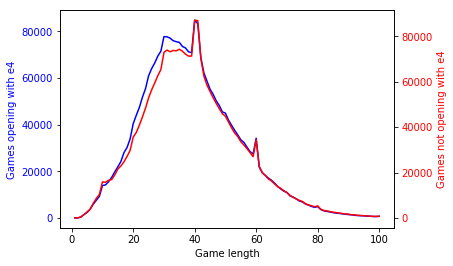

In [10]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.plot(e4_reg['length'], e4_reg['total'], color='blue')
ax1.set_ylabel('Games opening with e4', color='blue')  
ax1.tick_params(axis='y', labelcolor='blue')

ax1.set_xlabel('Game length')

ax2.plot(ne4_reg['length'], ne4_reg['total'], color='r')
ax2.set_ylabel('Games not opening with e4', color='r')  
ax2.tick_params(axis='y', labelcolor='r')

(0, 1)

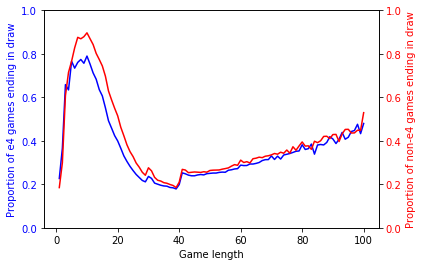

In [11]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

e4_reg_draw_prop = e4_reg['draw']/(e4_reg['white'] + e4_reg['black'] + e4_reg['draw'])
ne4_reg_draw_prop = ne4_reg['draw']/(ne4_reg['white'] + ne4_reg['black'] + ne4_reg['draw'])

'''
coef = np.polyfit(region['length'],region_draw_prop,1)
poly1d_fn = np.poly1d(coef)
coef = np.polyfit(region['length'],region_draw_prop,2)
poly2d_fn = np.poly1d(coef)
coef = np.polyfit(region['length'],region_draw_prop,3)
poly3d_fn = np.poly1d(coef)
'''

ax1.plot(e4_reg['length'], e4_reg_draw_prop, color='blue')
ax1.set_ylabel('Proportion of e4 games ending in draw', color='blue')  
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_ylim(0, 1)

ax1.set_xlabel('Game length')  

#ax1.plot(region['length'], poly1d_fn(region['length']), '--k')
#ax1.plot(region['length'], poly2d_fn(region['length']), '--k')
#ax1.plot(region['length'], poly3d_fn(region['length']), '--k')

ax2.plot(ne4_reg['length'], ne4_reg_draw_prop, color='r')
ax2.set_ylabel('Proportion of non-e4 games ending in draw', color='r')  
ax2.tick_params(axis='y', labelcolor='r')
ax2.set_ylim(0, 1)